# Code without barrier Submission

# Barclays-Problem Statement - Support Mail/BOT prediction

Name: Astha Raghuwanshi


Assignment dataset used: https://www.kaggle.com/datasets/wcukierski/enron-email-dataset

# Exploring the database

In [2]:
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)
import numpy as np
from IPython.display import display

filepath = "emails.csv"
emails = pd.read_csv(filepath)
headers = [header for header in emails.columns]
print("Successfully loaded {} rows and {} columns!".format(emails.shape[0], emails.shape[1]))
print(display(emails.head()))



Successfully loaded 517401 rows and 2 columns!


,file,message
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700..."
1,allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 ..."
2,allen-p/_sent_mail/100.,"Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>\nDate: Wed, 18 Oct 2000 03:00:00 -0700..."
3,allen-p/_sent_mail/1000.,"Message-ID: <13505866.1075863688222.JavaMail.evans@thyme>\nDate: Mon, 23 Oct 2000 06:13:00 -0700..."
4,allen-p/_sent_mail/1001.,"Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 05:07:00 -0700..."


None


In [3]:
# AN E-MAIL INSTANCE

In [4]:
print(emails.loc[10]["message"])

Message-ID: <33076797.1075855687515.JavaMail.evans@thyme>
Date: Mon, 16 Oct 2000 06:42:00 -0700 (PDT)
From: phillip.allen@enron.com
To: buck.buckner@honeywell.com
Subject: Re: FW: fixed forward or other Collar floor gas price terms
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: "Buckner, Buck" <buck.buckner@honeywell.com> @ ENRON
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Mr. Buckner,

 For delivered gas behind San Diego, Enron Energy Services is the appropriate 
Enron entity.  I have forwarded your request to Zarin Imam at EES.  Her phone 
number is 713-853-7107.  

Phillip Allen


In [5]:
# Features and Label:
# The headers 'To', 'Subject', 'From', and the message body are used as features. 
# The 'X-Folder' column contains the label. 
# Since all features are in string format, they need to be converted into numerical format for the computer to interpret them.


In [6]:
# Extract the headers from each email and add them to the emails DataFrame

In [7]:
import email

def insert_value(dictionary, key, value):
    if key in dictionary:
        values = dictionary.get(key)
        values.append(value)
        dictionary[key] = values
    else:
        dictionary[key] = [value]
    return dictionary

def get_headers(df, header_names):
    headers = {}
    messages = df["message"]
    for message in messages:
        e = email.message_from_string(message)
        for item in header_names:
            header = e.get(item)
            insert_value(dictionary = headers, key = item, value = header) 
    print("Successfully retrieved header information!")
    return headers
header_names = ["Date", "Subject", "X-Folder", "X-From", "X-To"]    
headers = get_headers(emails, header_names)


Successfully retrieved header information!


In [8]:
#The message body is extracted from the email data and added as a new column called Message_Body.

In [9]:
def get_messages(df):
    messages = []
    for item in df["message"]:
        # Return a message object structure from a string
        e = email.message_from_string(item)    
        # get message body  
        message_body = e.get_payload()
        message_body = message_body.lower()
        messages.append(message_body)
    print("Successfully retrieved message body from e-mails!")
    return messages
msg_body = get_messages(emails)
emails["Message-Body"] = msg_body


Successfully retrieved message body from e-mails!


In [10]:
#Get Employee Names
#A sample of unique values from the 'X-From' column reveals that there are some emails sent from non-employees, such as bloomberg.com and earnings.com. To obtain unique employee names, it would be more appropriate to use the employee names found in the 'file' column of the emails dataframe. This information is part of a string with other details and needs to be extracted and added to the emails. The employee names could be utilized to filter the data for records related to each employee.

In [11]:
x_from = pd.DataFrame(headers["X-From"], columns = ["X-From"])
print(x_from.iloc[:1000]["X-From"].unique()[:10])
if "X-From" not in emails.columns:
    emails = pd.concat([emails, x_from], axis = 1, join = 'inner')


['Phillip K Allen' 'Ina Rangel'
 'Multex Investor <1.11913372.-2@multexinvestornetwork.com>'
 '"Bloomberg.com" <messenger@ecm.bloomberg.com>'
 '"Arthur O\'Donnell" <aod@newsdata.com>' 'critical.notice@Enron.com'
 'market-reply@LISTSERV.DOWJONES.COM' 'Rebecca W Cantrell'
 '"Earnings.com" <webmaster@earnings.com>' 'Paul Kaufman']


In [12]:
def add_name(df, column, labels):
    new_data = {}
    for item in df[column]: 
        tokens = item.split('/')
        for i in range(0, len(labels)):
            value = tokens[i]
            key = labels[i]
            new_data = insert_value(new_data, key, value)        
    for key, value in new_data.items():
        df[key] = pd.Series(value)
    print("Successfully added new column!")
    return df
emails = add_name(df = emails, column = "file", labels = ["employee"])


Successfully added new column!


In [13]:
#exploring the folders

In [14]:
def add_headers(df, header_list):
    for label in header_list:
        df_new = pd.DataFrame(headers[label], columns = [label])
        if label not in df.columns:
            df = pd.concat([df, df_new], axis = 1)
    return df
remaining_headers = ["Date", "Subject", "X-To", "X-From", "X-Folder"]
emails = add_headers(df = emails, header_list = remaining_headers)
print("Below is the emails dataframe with all the pertinent headers appended")
print(display(emails.iloc[:1]))


Below is the emails dataframe with all the pertinent headers appended


,file,message,Message-Body,X-From,employee,Date,Subject,X-To,X-Folder
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700...",here is our forecast\n\n,Phillip K Allen,allen-p,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,Tim Belden <Tim Belden/Enron@EnronXGate>,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail"


None


In [15]:
#A sample of randomly selected folders from a newly created "folders" dataframe indicates the existence of numerous unique folders utilized by employees.

In [16]:
print(emails["X-Folder"].sample(17))


143822             \Michael_Grigsby_Jun2001\Notes Folders\All documents
496523                  \Kim_Watson_Mar2002\Watson, Kimberly\Sent Items
94863                  \Lindy_Donoho_Mar2002_1\Donoho, Lindy\Sent Items
428681           \Sara_Shackleton_Dec2000_June2001_2\Notes Folders\Sent
346869     \Gerald_Nemec_Dec2000_June2001_2\Notes Folders\All documents
160621             \Mary_Hain_Aug2000_Jul2001\Notes Folders\Notes inbox
197728                         \Tanya_Jones_June2001\Notes Folders\Sent
433037             \Jeffrey_Shankman_Jan2002\Shankman, Jeffrey A.\Inbox
59183               \Jeff_Dasovich_June2001\Notes Folders\All documents
440945                           \ExMerge - Shively, Hunter S.\Contacts
466267                 \kate symes 6-27-02\Notes Folders\Corporate comm
239939           \Steven_Kean_Dec2000_1\Notes Folders\Calendar\Untitled
216471     \Vincent_Kaminski_Jun2001_2\Notes Folders\Discussion threads
453492    \JSTEFFE (Non-Privileged)\Steffes, James D.\California

# Visualization

# Visualizing folders by size

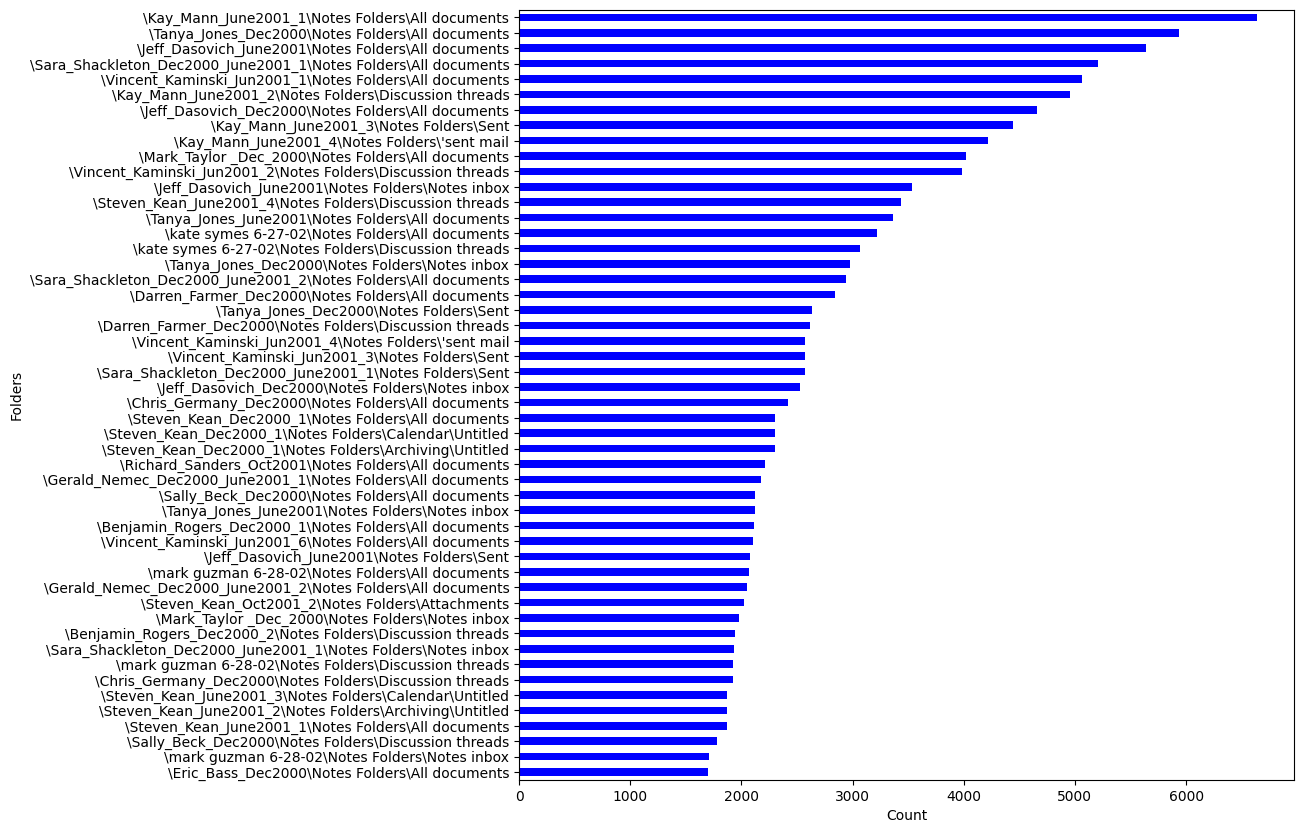

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming emails is your DataFrame containing email data and folders column represents the folders
mail_count = emails["X-Folder"].value_counts()

# Selecting the top 50 folders for visualization
top_folders = mail_count.head(50)

# Plotting
plt.figure(figsize=(10, 10))
top_folders.plot(kind='barh', color='b')
plt.xlabel('Count')
plt.ylabel('Folders')
plt.gca().invert_yaxis()  # Invert y-axis to have highest count at the top
plt.show()


In [19]:
#**Figure 1**: Bar plot displaying the 50 folders with the highest email counts.
#An examination of the `williams-w3` folder reveals that `schedule crawler` and `bill williams iii` contained a significant number of emails, making them the most utilized folders by this employee. These two folders also ranked among the top 5 largest folders used by any employee at Enron.

In [20]:
williams = emails[emails["employee"] == "williams-w3"]
williams["X-Folder"].value_counts()[:8]


X-Folder
\ExMerge - Williams III, Bill\Schedule Crawler             1398
\Williams III, Bill (Non-Privileged)\Bill Williams III     1022
\ExMerge - Williams III, Bill\Sent Items                    519
\ExMerge - Williams III, Bill\Inbox                         137
\ExMerge - Williams III, Bill\HR                             86
\ExMerge - Williams III, Bill\SymesEES                       81
\ExMerge - Williams III, Bill\Human Resources                45
\ExMerge - Williams III, Bill\Operations Committee/ISAS      19
Name: count, dtype: int64

# visualizing e-mail count by employee

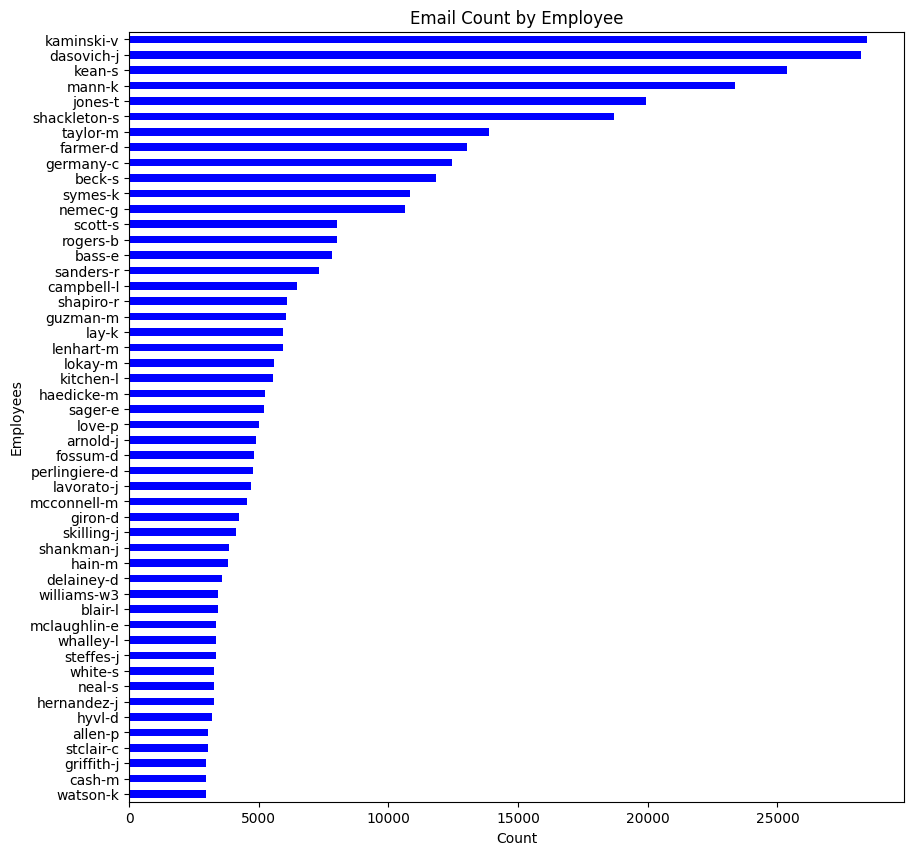

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming emails is your DataFrame containing email data
mail_count = emails["employee"].value_counts()

# Selecting the top 50 employees for visualization
top_employees = mail_count.head(50)

# Plotting
plt.figure(figsize=(10, 10))
top_employees.plot(kind='barh', color='b')
plt.xlabel('Count')
plt.ylabel('Employees')
plt.title('Email Count by Employee')
plt.gca().invert_yaxis()  # Invert y-axis to have highest count at the top
plt.show()


In [22]:
#**Figure 2**: Bar chart illustrating the top 50 employees with the highest count of sent emails.

# DATA PREPROSSESING AND CLEANING

In [23]:
#Here is a list of tasks to be performed on the data:
# 1. Convert the date column to datetime format.
# 2. Remove non-topical folders.
# 3. Exclude folders containing too few emails (less than 2).
# 4. Select employees with over 1000 emails.
# 5. Drop rows with missing values.
# 6. Encode class labels.
# 7. Implement the Bag-of-Words model.
# 8. Tokenize the text.
# 9. Eliminate unwanted characters from the message, Subject, X-To, and X-From columns.
# 10. Assemble matrices.
# 11. Count tokens.
# 12. Remove stop-words.

In [24]:
from dateutil import parser

# Parse the date strings
emails["Date"] = emails["Date"].apply(parser.parse)

print(emails.iloc[:1]["Date"])


0    2001-05-14 16:39:00-07:00
Name: Date, dtype: object


In [25]:
### Exclude Irrelevant Folders

# The `X-Folder` column comprises various folders and subfolders, some of which are irrelevant for our classification task. These irrelevant folders, known as non-topical folders, hold emails irrespective of their content. Due to their generic nature, training a classifier using these folders could lead to inaccuracies. Here are examples of non-topical folders that are excluded from the analysis:
# * all_documents
# * discussion_threads
# * sent
# * deleted_items
# * inbox
# * sent_items
# * notes_inbox
# * _sent_mail
# * calendar

In [36]:
def preprocess_folder(data):
    folders = []
    for item in data:
        if pd.isna(item) or item == '':
            folders.append(np.nan)
        else:
            item = item.split("\\")[-1]
            item = item.lower()
            folders.append(item)
    print("Folder cleaned!")
    return folders  

emails["X-Folder"] = preprocess_folder(emails["X-Folder"])


Folder cleaned!


In [37]:
#Folders we can eliminate by filtering out
unwanted_folders = ["all documents", "deleted items", "discussion threads", "sent", "deleted Items", "inbox",
                   "sent items", "'sent mail", "untitled", "notes inbox", "junk file", "calendar"]

# A new dataframe without non-topical folders
emails = emails.loc[~emails['X-Folder'].isin(unwanted_folders)]
print(emails.iloc[:15]["X-Folder"].value_counts())


X-Folder
straw                   8
2000 conference         3
contacts                2
active international    1
avaya                   1
Name: count, dtype: int64


In [38]:
# Retrieve emails belonging to employees with more than 2000 emails.

In [39]:
email_count = dict(emails["employee"].value_counts())
reduced_emails = [key for key, val in email_count.items() if val >= 2000]
emails = emails.loc[emails['employee'].isin(reduced_emails)]
print(emails["employee"].value_counts())


employee
kean-s         5550
kaminski-v     4483
kitchen-l      4034
farmer-d       3786
williams-w3    2775
lokay-m        2554
taylor-m       2477
shapiro-r      2036
beck-s         2013
Name: count, dtype: int64


In [40]:
#Handling Missing Values:
#We observe missing values in the X-From, Folder, and X-To columns. Since the number of missing values is relatively small compared to the dataset's size, we can proceed by dropping the rows containing these missing values.

In [41]:
emails.isnull().sum()


file            0
message         0
Message-Body    0
X-From          3
employee        0
Date            0
Subject         0
X-To            3
X-Folder        3
dtype: int64

In [42]:
emails.dropna(inplace = True)
emails.isnull().sum()

file            0
message         0
Message-Body    0
X-From          0
employee        0
Date            0
Subject         0
X-To            0
X-Folder        0
dtype: int64

# BAG OF WORDS MODEL

To enable the computer to analyze emails, it needs to interpret the text by creating a numerical representation. One approach is to use a Bag-of-Words model. This model takes the emails as strings and converts them into numerical vectors, indicating the frequency of each unique word across the entire dataset.

# TOKENIZATION

In [44]:
def tokenize(row):
    if row is None or row == '':
        tokens = ""
    else:
        tokens = row.split(" ")
    return tokens


# Remove Regular Expressions:
To clean the text data, it's essential to eliminate regular expressions, including punctuation marks and nonword characters. Python's regular expression (regex) library will be utilized for this task.

In [45]:
import re

def remove_reg_expressions(row):
    tokens = []
    try:
        for token in row:
            token = token.lower()
            token = re.sub(r'[\W\d]', " ", token)
            tokens.append(token)
    except:
        token = ""
        tokens.append(token)
    return tokens


# Stop-word Removal:
Additionally, stop-words are eliminated from the text. Stop-words are highly common words in the language that don't contribute significantly to the meaning of the text. Examples include "is," "and," "the," and "are." The NLTK library provides a list of 127 English stop-words, which can be utilized to filter out these tokenized strings.

In [46]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')    

def stop_word_removal(row):
    token = [token for token in row if token not in stopwords]
    token = filter(None, token)
    return token


[nltk_data] Downloading package stopwords to C:\Users\Astha
[nltk_data]     Raghuwanshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Assemble matrices:
The assemble_bag() function orchestrates the tokenize(), remove_reg_expressions(), and stop_word_removal() functions to preprocess the data. Subsequently, it constructs a new dataframe encompassing all the distinct words identified in the text documents. It tallies the frequency of each word and then furnishes the resulting dataframe.

In [47]:
def assemble_bag(data):
    data = data.apply(tokenize)
    data = data.apply(remove_reg_expressions)
    
    unique_tokens = []
    single_tokens = []

    for item in data:
        for token in item:
            if token in single_tokens:
                if token not in unique_tokens:
                    unique_tokens.append(token)
            else:
                single_tokens.append(token)
    
    df = pd.DataFrame(0, index = np.arange(len(data)), columns = unique_tokens)
    
    for i, item in enumerate(data):
        for token in item:
            if token in unique_tokens:
                df.iloc[i][token] += 1    
    return df


# Model Building

# Multiclass Categorization with Logistic Regression
In this section, our attention centers on a singular Enron employee for our categorization task. Upon understanding the procedures entailed in classifying the emails of one employee, we can extrapolate the same methodology to address similar challenges for additional employees.

In [49]:
#Choosing a random employee

In [75]:
employee = emails[emails["employee"] == "taylor-m"]


# Remove Folders
Additionally, we filter out folders with an insufficient number of emails, as they would not significantly contribute to training our classifier. Moreover, it can be deduced that some folders with minimal email content were created but remained unused.

In [76]:
def remove_folders(emails, n):
    # Returns the folders containing more than 'n' number of e-mails
    email_count = dict(emails["X-Folder"].value_counts())
    small_folders = [key for key, val in email_count.items() if val <= n]
    emails = emails.loc[~emails['X-Folder'].isin(small_folders)]
    return emails


In [77]:
n = 200
employee = remove_folders(employee, n)

In [ ]:
# Encoding Class Label 
To facilitate the interpretation of data by the learning algorithm, the folders listed in the Folders column must be converted into integers. As these folders are categorical, the specific integer assigned to each folder is arbitrary. Utilizing Scikit-learn's LabelEncoder class, this conversion was implemented, and the result was stored in a new column labeled 'y', which serves as our preprocessed set of labels.

In [78]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(df):
    class_le = LabelEncoder()
    # apply label encoder on the `Folder` column
    y = class_le.fit_transform(df['X-Folder'])
    df.loc[:,'y'] = y
    return df


In [79]:
label_encoder(employee)    
print("Randomly selected labels representing our folders")
unique_folders = employee["y"].unique()
print (unique_folders)


Randomly selected labels representing our folders
[0 1]


In [80]:
#Sorting data chronologically

In [81]:
def sort(df):   
    df = df.sort_values(by = "Date", axis = 0)
    return df


In [82]:
employee = sort(employee)
print(display(employee.loc[:,("Date", "y", "X-Folder")][:10]))


,Date,y,X-Folder
483282,1999-04-30 06:34:00-07:00,1,online trading
483312,1999-05-06 02:23:00-07:00,1,online trading
483323,1999-05-20 06:48:00-07:00,1,online trading
483334,1999-05-24 16:16:00-07:00,1,online trading
483345,1999-05-25 02:53:00-07:00,1,online trading
483356,1999-05-26 10:52:00-07:00,1,online trading
483367,1999-05-27 10:01:00-07:00,1,online trading
483193,1999-05-27 11:07:00-07:00,1,online trading
483171,1999-05-27 11:39:00-07:00,1,online trading
483182,1999-05-27 12:25:00-07:00,1,online trading


None


# Prepare Feature
For each feature, the assemble_bag() method is invoked to generate a new dataframe. Subsequently, these dataframes are combined into a new dataframe named X.

In [83]:
def prepare_features(df):
    from_bag = assemble_bag(df["X-From"])
    to_bag = assemble_bag(df["X-To"])
    message_bag = assemble_bag(df["Message-Body"])
    subject_bag = assemble_bag(df["Subject"])
    frames = [from_bag, subject_bag, to_bag, message_bag]
    X = pd.concat(frames, axis = 1, join = 'inner')
    X.drop(labels = [" ", ""], inplace = True, axis = 1)
    return X


In [84]:
X = prepare_features(employee)

C:\Users\Astha Raghuwanshi\AppData\Local\Temp\ipykernel_23244\3048516598.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.iloc[i][token] += 1


In [85]:
print("A peek into some of the columns in the features dataframe:")
print(display(X.iloc[:5, 1000:]))

A peek into some of the columns in the features dataframe:


,password,must,consider,website,together,mind,bearing,entering,line,document,...,efforts,stream,manages specialist,ranked,recognized,fortune,magazine,awards,reduced,removal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


None


# TRAINING

In multiclass classification training, we need to train n models, where n represents the number of unique folders available. Employing a one-vs-all methodology, each model is trained to classify emails belonging to a specific folder as positive (1 or True) while considering emails not associated with that folder as negative (0 or False).

For instance: If folders like "cinergy index," "fundamentals," and "meetings" exist, then we train 3 models based on the following conditions:

1. All emails associated with "cinergy index" are labeled positive (1), while those from other folders are labeled negative (0).

2. All emails linked to "fundamentals" are marked positive (1), and those from other folders are labeled negative (0).

3. All emails assigned to "miso" are labeled positive (1), and those from other folders are designated negative (0).

In [86]:
from sklearn.linear_model import LogisticRegression

def split_data(X, employee):
    # split data into training and testing sets
    training_size = int(len(employee) * 0.8)
    X_train = X[:training_size]
    X_test = X[training_size:]
    y_test = employee[training_size:]["y"]
    y_train = employee[:training_size]["y"]
    return X_train, X_test, y_test, training_size


In [87]:
X_train, X_test, y_test, training_size = split_data(X, employee)


Train n number of models where n is the number of unique words in the dataset

In [88]:
def fit(df, training_size, X_train):
    models = {}
    filtered_folders = []
    unique_folders = df["y"].unique()
    for folder in unique_folders:
        model = LogisticRegression()
        y_train = df[:training_size]["y"] == folder
        try:
            model.fit(X_train, y_train)
            models[folder] = model
            filtered_folders.append(folder)
        except:
            pass
    return models, filtered_folders


In [89]:
models, filtered_folders = fit(employee, training_size, X_train)


# TESTING

In [90]:
def predict(X_test, models, filtered_folders):
    testing_probs = pd.DataFrame(columns = filtered_folders)
    for folder in filtered_folders:
        # Compute probability
        testing_probs[folder] = models[folder].predict_proba(X_test)[:,1]
    y_test_pred = testing_probs.idxmax(axis = 1)
    return y_test_pred


In [91]:
y_test_pred = predict(X_test, models, filtered_folders)


# ACCURACY SCORE

In [92]:
from sklearn.metrics import accuracy_score

def acc_score(y_test, y_test_pred):
    score = accuracy_score(y_test, y_test_pred)
    return score


In [93]:
acc_score(y_test, y_test_pred)


0.7261904761904762

# INTERPRETATION OF PREDICTION ACCURACY

Classification of Multiple Employees' Emails:


The performance evaluation on this particular employee reveals poor results. It's essential to consider the variability in the number of folders utilized by each employee, as it can impact the model's effectiveness.

Certain folders may lack sufficient email data to be statistically significant. To address this issue, we can streamline the analysis by focusing on folders with a higher volume of emails.

# FUTURE SCOPE

We can perform classification on subsets of email data for different employees and folder sizes to assess the model's performance under various conditions.







# Psuedo code: 

In [ ]:
# employee_list = emails["employee"].unique()
# folder_size = [5, 10, 15, 20, 25]

# def classify_emails(data, folder_size, employee_list):
#     results = pd.DataFrame(columns = folder_size)
#     results["employee"] = employee_list
#     for i, name in enumerate(employee_list):
#         for num in folder_siSze:
#             # get data for employee
#             employee = data[data["employee"] == name]
#             employee = remove_folders(employee, num)
#             employee = label_encoder(employee)
#             if len(employee["y"].unique()) < 2: 
#                 break
#             employee = sort(employee)
#             X = prepare_features(employee)
#             X_train, X_test, y_test, training_size = split_data(X, employee)
#             models, filtered_folders = fit(employee, training_size, X_train)
#             y_test_pred = predict(X_test, models, filtered_folders)
#             score = acc_score(y_test, y_test_pred)
#             # Add score to dataframe
#             results.loc[i][num] = score
#     return results

# results = classify_emails(data = emails, folder_size = folder_size, employee_list = employee_list)
# print(display(results))